# MULTIPLE POLYNOMIAL REGRESSION

<b>The data set used is the data set containing the real estate market information. It includes the number of rooms, the age of the building, the number of floors, square meters, and the price information.

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [144]:
df = pd.read_csv(r'D:\githubProjects\Machine-Learning\Supervised Learning\Model Regularization\real_estate')
df.head()

,Unnamed: 0,price,rooms,m2,floor,age
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [145]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [146]:
df.to_csv('real_estate.csv')

<b>Hold-Out

In [147]:
X = df.drop('price',axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


<b>Polynomial Degree Generating Function

In [148]:
from sklearn.preprocessing import PolynomialFeatures

<b>We create the polynomial degrees of the features from the second order to the tenth order and calculate the error score of the model created with each polynomial degree. Here we use RMSE as the error score.

In [149]:
rmses = []
degrees = np.arange(1,10)
min_rmse, min_deg = 1e10, 0

<b>The R2 measure can be overly sensitive when it comes to polynomial functions. Therefore, RMSE is widely used for error score when Grid Search is done to determine the appropriate polynomial degree.

<b>Train set Features

In [150]:
for deg in degrees:
    poly_features = PolynomialFeatures(degree=deg,include_bias=False)

    X_poly_train = poly_features.fit_transform(X_train)

    # Linear Reg.
    poly_reg = LinearRegression().fit(X_poly_train,y_train)

    # Comparison with test set
    X_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(X_poly_test)
    poly_mse = mean_squared_error(y_test,poly_predict)
    poly_rmse = np.sqrt(mean_squared_error(y_test,poly_predict))
    rmses.append(poly_rmse)

    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

In [151]:
print(f'Best Model RMSE :{min_rmse} degree :{min_deg}')

Best Model RMSE :56.48843719880914 degree :2


<b>RMSE scores for all polynomial values on the graph

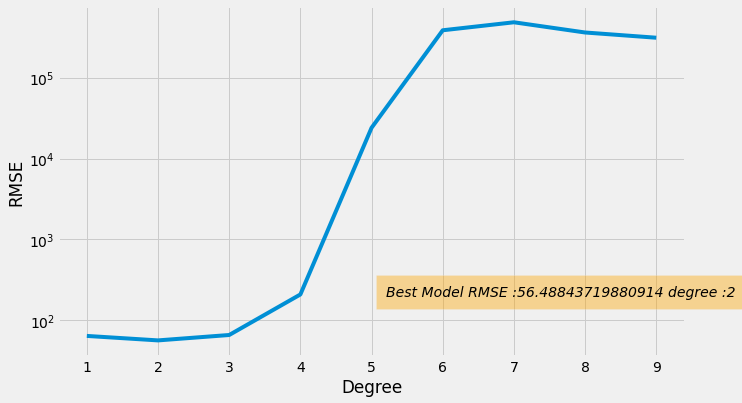

In [152]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(degrees,rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.text(5.2,200,(f'Best Model RMSE :{min_rmse} degree :{min_deg}'),style='italic',
         bbox={'facecolor' : 'orange', 'alpha' : 0.4, 'pad' : 10})
plt.show()

<b>The lowest error score is obtained when we take the polynomial degrees of all the features in the second degree. Now that we have determined the appropriate polynomial degree as 2, we can now create the model according to this polynomial degree and look at its performance in the test set.

In [153]:
poly_deg = PolynomialFeatures(degree=2)
X_train_poly = poly_deg.fit_transform(X_train)
X_test_poly = poly_deg.fit_transform(X_test)

In [154]:
poly_reg =LinearRegression().fit(X_train_poly,y_train)

model = LinearRegression().fit(X_train,y_train)

<b>Prediction performance of multilinear model for training and test sets

In [155]:
print(f'Linear Reg Train R2 :{model.score(X_train,y_train)}')
print(f'Linear Reg Test R2 :{model.score(X_test,y_test)}')

Linear Reg Train R2 :0.733739961656849
Linear Reg Test R2 :0.6987282352837991


<b>Prediction performance of multiple polynomial model for training and test sets

In [156]:
print(f'Polynomial Reg Train R2 :{poly_reg.score(X_train_poly,y_train)}')
print(f'Polynomial Reg Test R2 :{poly_reg.score(X_test_poly,y_test)}')

Polynomial Reg Train R2 :0.8488074651060601
Polynomial Reg Test R2 :0.7663814623333732


In [157]:
X_poly = poly_deg.transform(X)
df['price_pred'] = poly_reg.predict(X_poly)

<b>Graph

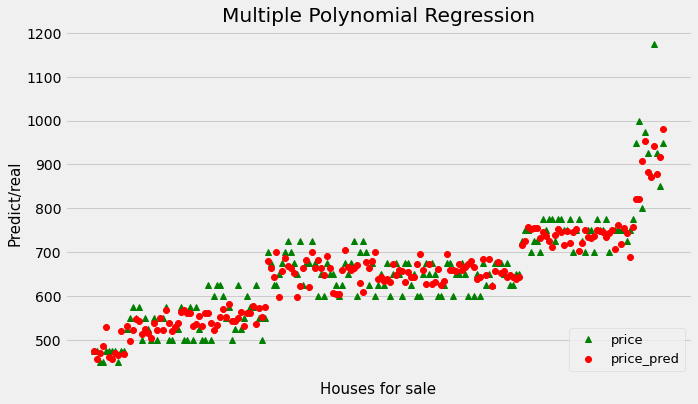

In [158]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
plt.title('Multiple Polynomial Regression')
plt.xticks(df['price'],df.index.values)
plt.plot(df['price'],'g^',label='price')
plt.xticks(df['price_pred'],df.index.values)
plt.plot(df['price_pred'],'ro',label='price_pred')
plt.xlabel('Houses for sale',fontsize=15)
plt.ylabel('Predict/real',fontsize=15)
plt.legend(fontsize=13,loc='lower right')
plt.show()

# DETERMINING THE SUITABLE POLYNOMIAL DEGREE

<b> Is there really a non-linear relationship between the prices of the flats for sale and each property? Can't the relation of the target variable with some properties be linear/polynomial with their own self or even if the relation of the target variable with the properties is curvilinear, does it have the same degree of polynomial relation with each of them?

In [159]:
df = pd.read_csv('real_estate.csv')
df.head()

,Unnamed: 0,price,rooms,m2,floor,age
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [160]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [161]:
X = df.drop('price',axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

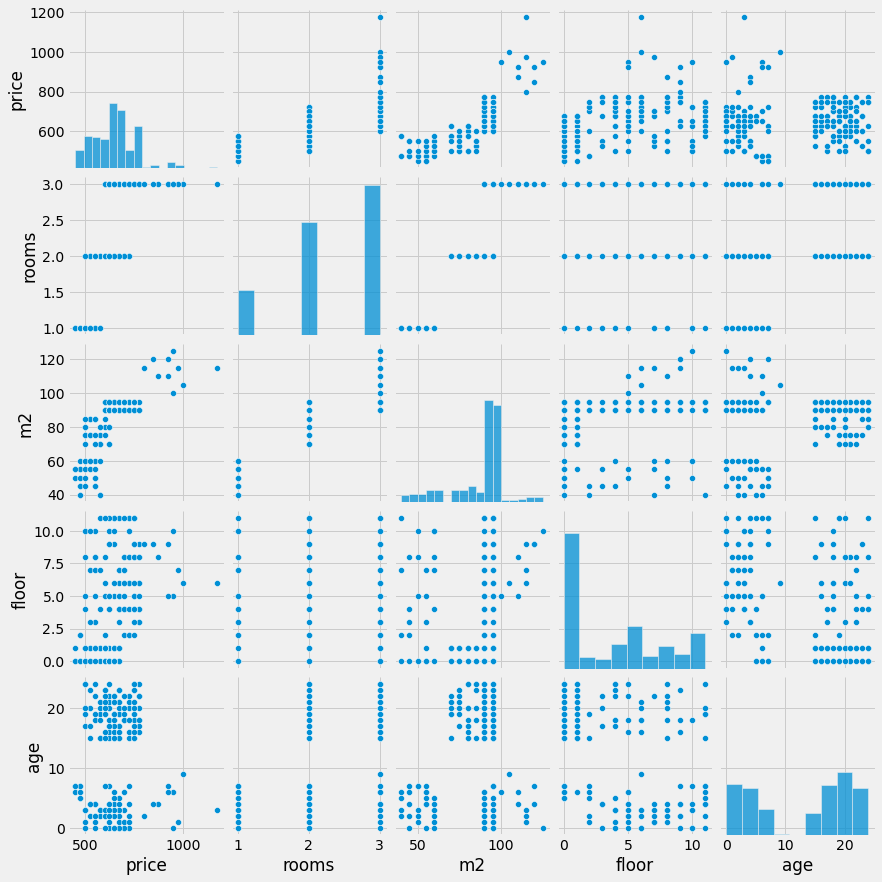

In [164]:
g = sns.pairplot(df)

<b>At first glance, a linear relationship between the price and the number of rooms can be clearly seen. We cannot say that there is a linear relationship with the same precision about the data points obtained from the scatter diagrams of the other properties of house prices.

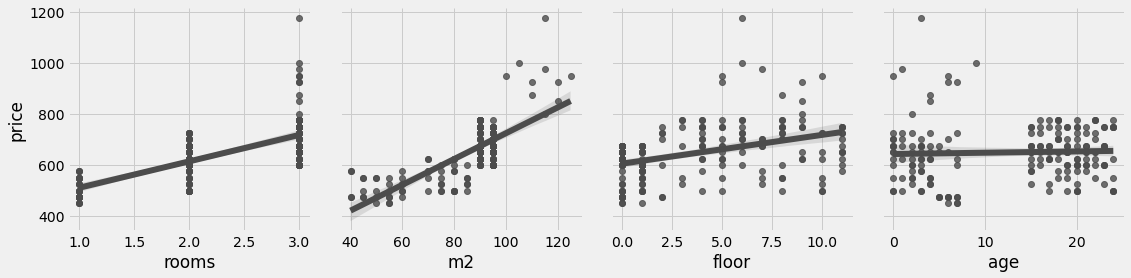

In [165]:
g = sns.PairGrid(df,y_vars=['price'],x_vars=['rooms','m2','floor','age'],height=4)

g.map(sns.regplot,lowess=False,color='.3')